In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dataset_with_classlebel_changed v1.csv') #DataFrame
#df.columns

#labels = df.type.unique()
#print (df)
df.head()
#print(df.info('class_label'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism,class_label
0,0.324876,0.899516,0.127783,0.209250,0.216259,micro-oop
1,0.324876,0.899516,0.127783,0.209250,0.216259,oop
2,0.215034,0.518943,0.085506,0.058149,0.532572,oop
3,0.307169,0.513725,0.098802,0.023125,0.657455,oop
4,0.370593,0.091606,0.085107,0.048429,0.447233,micro-oop


In [ ]:
counts = df.value_counts('class_label')
print(counts)

class_label
web-pro        360
oop            352
micro-oop      195
web-des        112
database        97
mobile          79
statistical     51
dtype: int64


Train set size: 1064
Validation set size: 57
Test set size: 125
Accuracy 0.3333333333333333
weighted Precision 0.15789473684210525
Weighted Recall 0.3333333333333333
Weighted F1 score 0.21315320386527814
              precision    recall  f1-score   support

    database       0.00      0.00      0.00         3
   micro-oop       0.00      0.00      0.00        10
      mobile       0.00      0.00      0.00         8
         oop       0.33      0.58      0.42        12
 statistical       0.00      0.00      0.00         4
     web-des       0.00      0.00      0.00         5
     web-pro       0.33      0.80      0.47        15

    accuracy                           0.33        57
   macro avg       0.10      0.20      0.13        57
weighted avg       0.16      0.33      0.21        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

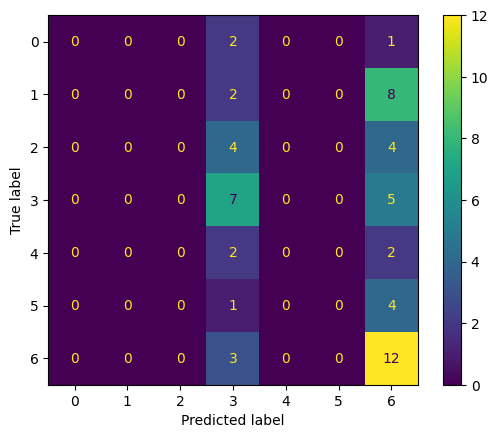

In [ ]:
#Naive Bayes without SMOTE
#Library import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the features and target variable, 
X = df.drop("class_label" , axis=1)
y = df.class_label

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

# Train a Multinomial Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)
# Test the classifier
y_pred_class = nb.predict(X_val)

# Calculate the model evaluation parameter
print("Accuracy", metrics.accuracy_score(y_val, y_pred_class))
print("weighted Precision", metrics.precision_score(y_val, y_pred_class, average='weighted'))
print("Weighted Recall", metrics.recall_score(y_val, y_pred_class, average='weighted'))
print("Weighted F1 score", metrics.f1_score(y_val, y_pred_class, average='weighted'))
print(classification_report(y_val, y_pred_class))
confusion_matrix = confusion_matrix(y_val, y_pred_class)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

Number of samples in each class before oversampling:
web-pro        360
oop            352
micro-oop      195
web-des        112
database        97
mobile          79
statistical     51
Name: class_label, dtype: int64
Train set size: (1121, 5)
Validation set size: (115, 5)
Test set size: (125, 5)
Validation Set Results:
              precision    recall  f1-score   support

    database       0.18      0.36      0.24        14
   micro-oop       0.29      0.12      0.17        17
      mobile       0.27      0.35      0.31        17
         oop       0.00      0.00      0.00        20
 statistical       0.00      0.00      0.00        18
     web-des       0.23      0.18      0.20        17
     web-pro       0.11      0.33      0.16        12

    accuracy                           0.17       115
   macro avg       0.15      0.19      0.15       115
weighted avg       0.15      0.17      0.15       115

Test Set Results:
              precision    recall  f1-score   support

    data

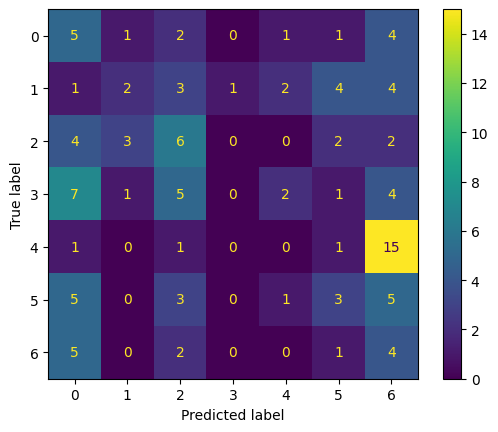

In [ ]:
#Naive Bayes with SMOTE
#Library import
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the features and target variable, 
X = df.drop("class_label" , axis=1)
y = df.class_label

# Count the number of samples in each class before oversampling
print("Number of samples in each class before oversampling:")
print(y.value_counts())

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

# Oversample the minority class
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_res, y_train_res, test_size=0.05, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val_res.shape)
print("Test set size:", X_test.shape)

# Train a Multinomial Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_res, y_train_res)
# Test the classifier
#y_pred_class = nb.predict(X_test)

# Evaluate the performance of the model on the validation data
y_val_pred = nb.predict(X_val_res)
print("Validation Set Results:")
print(classification_report(y_val_res, y_val_pred))

confusion_matrix = confusion_matrix(y_val_res, y_val_pred)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

# Evaluate the performance of the model on the test data
y_test_pred = nb.predict(X_test)
print("Test Set Results:")
print(classification_report(y_test, y_test_pred))

# Count the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(pd.Series(y_train_res).value_counts())


Train set size: 1064
Validation set size: 57
Test set size: 125
Accuracy 0.12280701754385964
weighted Precision 0.14580191050779284
Weighted Recall 0.12280701754385964
Weighted F1 score 0.12432138339579356
              precision    recall  f1-score   support

    database       0.00      0.00      0.00         3
   micro-oop       0.17      0.10      0.12        10
      mobile       0.33      0.12      0.18         8
         oop       0.24      0.33      0.28        12
 statistical       0.00      0.00      0.00         4
     web-des       0.00      0.00      0.00         5
     web-pro       0.08      0.07      0.07        15

    accuracy                           0.12        57
   macro avg       0.12      0.09      0.09        57
weighted avg       0.15      0.12      0.12        57



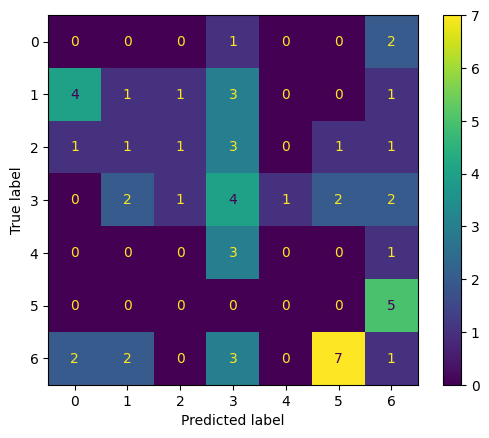

In [ ]:
#Decision Tree without SMOTE
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the features and target variable, Split the data into training and test sets
X = df.drop("class_label" , axis=1)
y = df.class_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

# Train the classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Test the classifier
y_pred_class = tree.predict(X_val)

# Calculate the model evaluation parameter
print("Accuracy", metrics.accuracy_score(y_val, y_pred_class))
print("weighted Precision", metrics.precision_score(y_val, y_pred_class, average='weighted'))
print("Weighted Recall", metrics.recall_score(y_val, y_pred_class, average='weighted'))
print("Weighted F1 score", metrics.f1_score(y_val, y_pred_class, average='weighted'))
print(classification_report(y_val, y_pred_class))
confusion_matrix = confusion_matrix(y_val, y_pred_class)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

In [ ]:
#Decision Tree with SMOTE


Number of samples in each class before oversampling:
web-pro        360
oop            352
micro-oop      195
web-des        112
database        97
mobile          79
statistical     51
Name: class_label, dtype: int64
Train set size: (1121, 5)
Validation set size: (115, 5)
Test set size: (125, 5)
Validation Set Results:
              precision    recall  f1-score   support

    database       0.29      0.36      0.32        14
   micro-oop       0.31      0.29      0.30        17
      mobile       0.74      0.82      0.78        17
         oop       0.38      0.25      0.30        20
 statistical       0.75      0.83      0.79        18
     web-des       0.46      0.35      0.40        17
     web-pro       0.00      0.00      0.00        12

    accuracy                           0.43       115
   macro avg       0.42      0.42      0.41       115
weighted avg       0.44      0.43      0.43       115

Test Set Results:
              precision    recall  f1-score   support

    data

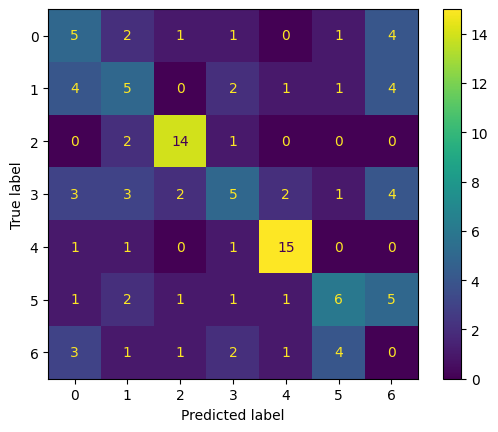

In [ ]:
#Decision Tree with SMOTE
#Library import
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the features and target variable, 
X = df.drop("class_label" , axis=1)
y = df.class_label

# Count the number of samples in each class before oversampling
print("Number of samples in each class before oversampling:")
print(y.value_counts())

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

# Oversample the minority class
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_res, y_train_res, test_size=0.05, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val_res.shape)
print("Test set size:", X_test.shape)

# Train a Multinomial Naive Bayes classifier
tree = DecisionTreeClassifier()
tree.fit(X_train_res, y_train_res)
# Test the classifier
#y_pred_class = nb.predict(X_test)

# Evaluate the performance of the model on the validation data
y_val_pred = tree.predict(X_val_res)
print("Validation Set Results:")
print(classification_report(y_val_res, y_val_pred))

confusion_matrix = confusion_matrix(y_val_res, y_val_pred)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

# Evaluate the performance of the model on the test data
y_test_pred = tree.predict(X_test)
print("Test Set Results:")
print(classification_report(y_test, y_test_pred))

# Count the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(pd.Series(y_train_res).value_counts())


Train set size: 700
Validation set size: 234
Test set size: 312
Accuracy 0.2905982905982906
weighted Precision 0.15913264917526831
Weighted Recall 0.2905982905982906
Weighted F1 score 0.2025229044459814
              precision    recall  f1-score   support

    database       0.00      0.00      0.00        15
   micro-oop       0.00      0.00      0.00        37
      mobile       0.00      0.00      0.00        17
         oop       0.29      0.40      0.34        65
 statistical       0.00      0.00      0.00        10
     web-des       0.00      0.00      0.00        27
     web-pro       0.29      0.67      0.40        63

    accuracy                           0.29       234
   macro avg       0.08      0.15      0.11       234
weighted avg       0.16      0.29      0.20       234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

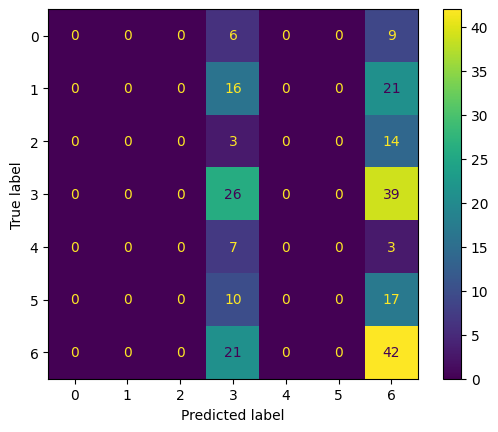

In [ ]:
#Support Vector Classifier without SMOTE
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the features and target variable, Split the data into training and test sets
X = df.drop("class_label" , axis=1)
y = df.class_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])
# Train the classifier
svm = SVC()
svm.fit(X_train, y_train)

# Test the classifier
y_pred_class = svm.predict(X_val)

# Calculate the model evaluation parameter
print("Accuracy", metrics.accuracy_score(y_val, y_pred_class))
print("weighted Precision", metrics.precision_score(y_val, y_pred_class, average='weighted'))
print("Weighted Recall", metrics.recall_score(y_val, y_pred_class, average='weighted'))
print("Weighted F1 score", metrics.f1_score(y_val, y_pred_class, average='weighted'))
print(classification_report(y_val, y_pred_class))
confusion_matrix = confusion_matrix(y_val, y_pred_class)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()


Number of samples in each class before oversampling:
web-pro        360
oop            352
micro-oop      195
web-des        112
database        97
mobile          79
statistical     51
Name: class_label, dtype: int64
Train set size: (1121, 5)
Validation set size: (115, 5)
Test set size: (125, 5)
Validation Set Results:
              precision    recall  f1-score   support

    database       0.29      0.36      0.32        14
   micro-oop       0.31      0.29      0.30        17
      mobile       0.74      0.82      0.78        17
         oop       0.38      0.25      0.30        20
 statistical       0.75      0.83      0.79        18
     web-des       0.46      0.35      0.40        17
     web-pro       0.00      0.00      0.00        12

    accuracy                           0.43       115
   macro avg       0.42      0.42      0.41       115
weighted avg       0.44      0.43      0.43       115

Test Set Results:
              precision    recall  f1-score   support

    data

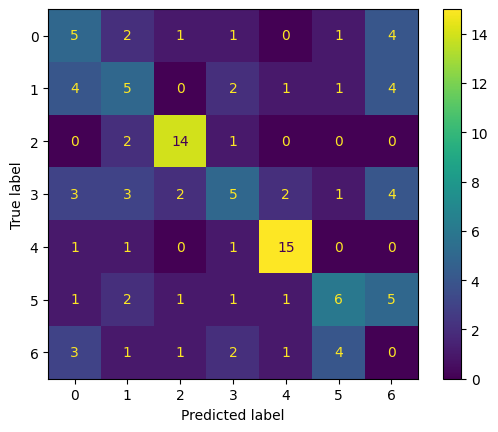

In [ ]:
#Support Vector Classifier with SMOTE
#Library import
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the features and target variable, 
X = df.drop("class_label" , axis=1)
y = df.class_label

# Count the number of samples in each class before oversampling
print("Number of samples in each class before oversampling:")
print(y.value_counts())

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

# Oversample the minority class
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_res, y_train_res, test_size=0.05, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val_res.shape)
print("Test set size:", X_test.shape)

# Train a Support Vector classifier
svm = SVC()
svm.fit(X_train_res, y_train_res)
# Test the classifier
#y_pred_class = nb.predict(X_test)

# Evaluate the performance of the model on the validation data
y_val_pred = tree.predict(X_val_res)
print("Validation Set Results:")
print(classification_report(y_val_res, y_val_pred))

confusion_matrix = confusion_matrix(y_val_res, y_val_pred)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

# Evaluate the performance of the model on the test data
y_test_pred = tree.predict(X_test)
print("Test Set Results:")
print(classification_report(y_test, y_test_pred))

# Count the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(pd.Series(y_train_res).value_counts())


Train set size: 700
Validation set size: 234
Test set size: 312
Accuracy 0.2692307692307692
weighted Precision 0.1509049097995967
Weighted Recall 0.2692307692307692
Weighted F1 score 0.1915364988960816
              precision    recall  f1-score   support

    database       0.00      0.00      0.00        15
   micro-oop       0.00      0.00      0.00        37
      mobile       0.00      0.00      0.00        17
         oop       0.28      0.40      0.33        65
 statistical       0.00      0.00      0.00        10
     web-des       0.00      0.00      0.00        27
     web-pro       0.27      0.59      0.37        63

    accuracy                           0.27       234
   macro avg       0.08      0.14      0.10       234
weighted avg       0.15      0.27      0.19       234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

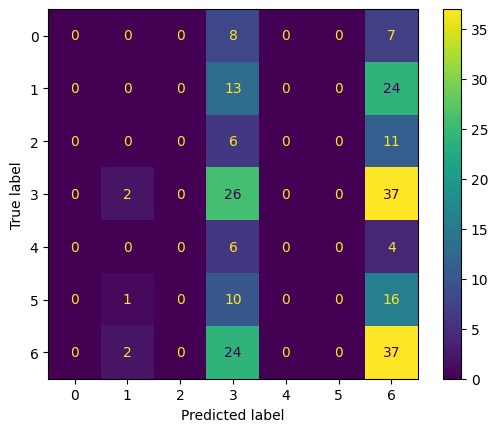

In [ ]:
#KNN without SMOTE
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the features and target variable, Split the data into training and test sets
X = df.drop("class_label" , axis=1)
y = df.class_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])
# create and train KNN model
knn = KNeighborsClassifier(n_neighbors=51)
knn.fit(X_train, y_train)

# test model on testing data
y_pred_class = knn.predict(X_val)

# Calculate the model evaluation parameter
print("Accuracy", metrics.accuracy_score(y_val, y_pred_class))
print("weighted Precision", metrics.precision_score(y_val, y_pred_class, average='weighted'))
print("Weighted Recall", metrics.recall_score(y_val, y_pred_class, average='weighted'))
print("Weighted F1 score", metrics.f1_score(y_val, y_pred_class, average='weighted'))
print(classification_report(y_val, y_pred_class))
confusion_matrix = confusion_matrix(y_val, y_pred_class)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

Number of samples in each class before oversampling:
web-pro        360
oop            352
micro-oop      195
web-des        112
database        97
mobile          79
statistical     51
Name: class_label, dtype: int64
Train set size: (1121, 5)
Validation set size: (115, 5)
Test set size: (125, 5)
Validation Set Results:
              precision    recall  f1-score   support

    database       0.21      0.21      0.21        14
   micro-oop       0.21      0.18      0.19        17
      mobile       0.37      0.59      0.45        17
         oop       0.40      0.10      0.16        20
 statistical       0.43      0.83      0.57        18
     web-des       0.21      0.18      0.19        17
     web-pro       0.00      0.00      0.00        12

    accuracy                           0.31       115
   macro avg       0.26      0.30      0.25       115
weighted avg       0.28      0.31      0.27       115

Test Set Results:
              precision    recall  f1-score   support

    data

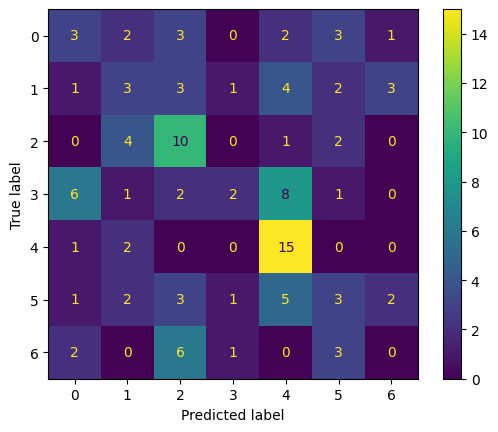

In [ ]:
#KNN with SMOTE
#Library import
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the features and target variable, 
X = df.drop("class_label" , axis=1)
y = df.class_label

# Count the number of samples in each class before oversampling
print("Number of samples in each class before oversampling:")
print(y.value_counts())

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

# Oversample the minority class
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_res, y_train_res, test_size=0.05, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val_res.shape)
print("Test set size:", X_test.shape)

# Train a Support Vector classifier
knn = KNeighborsClassifier(n_neighbors=51)
knn.fit(X_train_res, y_train_res)
# Test the classifier
#y_pred_class = nb.predict(X_test)

# Evaluate the performance of the model on the validation data
y_val_pred = knn.predict(X_val_res)
print("Validation Set Results:")
print(classification_report(y_val_res, y_val_pred))

confusion_matrix = confusion_matrix(y_val_res, y_val_pred)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

# Evaluate the performance of the model on the test data
y_test_pred = knn.predict(X_test)
print("Test Set Results:")
print(classification_report(y_test, y_test_pred))

# Count the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(pd.Series(y_train_res).value_counts())


Train set size: 700
Validation set size: 234
Test set size: 312
Accuracy 0.2863247863247863
weighted Precision 0.15774731070190634
Weighted Recall 0.2863247863247863
Weighted F1 score 0.20294542259046547
              precision    recall  f1-score   support

    database       0.00      0.00      0.00        15
   micro-oop       0.00      0.00      0.00        37
      mobile       0.00      0.00      0.00        17
         oop       0.31      0.51      0.38        65
 statistical       0.00      0.00      0.00        10
     web-des       0.00      0.00      0.00        27
     web-pro       0.27      0.54      0.36        63

    accuracy                           0.29       234
   macro avg       0.08      0.15      0.11       234
weighted avg       0.16      0.29      0.20       234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

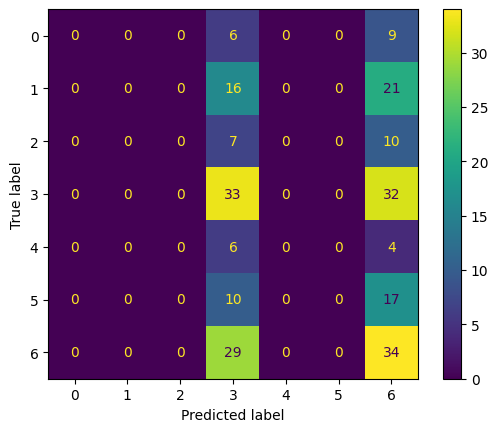

In [ ]:
#Logistic Regression without SMOTE
#Library import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the features and target variable, Split the data into training and test sets
X = df.drop("class_label" , axis=1)
y = df.class_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])
# Train  classifier
LR = LogisticRegression()
LR.fit(X_train, y_train)
# Test the classifier
y_pred_class = LR.predict(X_val)

# Calculate the model evaluation parameter
print("Accuracy", metrics.accuracy_score(y_val, y_pred_class))
print("weighted Precision", metrics.precision_score(y_val, y_pred_class, average='weighted'))
print("Weighted Recall", metrics.recall_score(y_val, y_pred_class, average='weighted'))
print("Weighted F1 score", metrics.f1_score(y_val, y_pred_class, average='weighted'))
print(classification_report(y_val, y_pred_class))
confusion_matrix = confusion_matrix(y_val, y_pred_class)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

Number of samples in each class before oversampling:
web-pro        360
oop            352
micro-oop      195
web-des        112
database        97
mobile          79
statistical     51
Name: class_label, dtype: int64
Train set size: (1121, 5)
Validation set size: (115, 5)
Test set size: (125, 5)
Validation Set Results:
              precision    recall  f1-score   support

    database       0.08      0.14      0.11        14
   micro-oop       0.20      0.12      0.15        17
      mobile       0.27      0.35      0.31        17
         oop       0.17      0.10      0.12        20
 statistical       0.17      0.11      0.13        18
     web-des       0.15      0.29      0.20        17
     web-pro       0.00      0.00      0.00        12

    accuracy                           0.17       115
   macro avg       0.15      0.16      0.15       115
weighted avg       0.16      0.17      0.15       115

Test Set Results:
              precision    recall  f1-score   support

    data

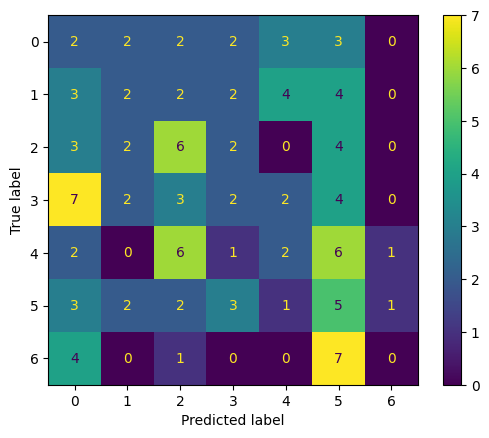

In [ ]:
#Logistic Regression Classifier with SMOTE
#Library import
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the features and target variable, 
X = df.drop("class_label" , axis=1)
y = df.class_label

# Count the number of samples in each class before oversampling
print("Number of samples in each class before oversampling:")
print(y.value_counts())

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

# Oversample the minority class
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_res, y_train_res, test_size=0.05, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val_res.shape)
print("Test set size:", X_test.shape)

# Train a Logistic Regression classifier
LR = LogisticRegression()
LR.fit(X_train_res, y_train_res)
# Test the classifier
#y_pred_class = nb.predict(X_test)

# Evaluate the performance of the model on the validation data
y_val_pred = LR.predict(X_val_res)
print("Validation Set Results:")
print(classification_report(y_val_res, y_val_pred))

confusion_matrix = confusion_matrix(y_val_res, y_val_pred)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

# Evaluate the performance of the model on the test data
y_test_pred = LR.predict(X_test)
print("Test Set Results:")
print(classification_report(y_test, y_test_pred))

# Count the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(pd.Series(y_train_res).value_counts())


Train set size: 700
Validation set size: 234
Test set size: 312
Accuracy 0.2264957264957265
weighted Precision 0.17802091275294432
Weighted Recall 0.2264957264957265
Weighted F1 score 0.19699001220740353
              precision    recall  f1-score   support

    database       0.00      0.00      0.00        15
   micro-oop       0.21      0.16      0.18        37
      mobile       0.00      0.00      0.00        17
         oop       0.33      0.42      0.36        65
 statistical       0.00      0.00      0.00        10
     web-des       0.00      0.00      0.00        27
     web-pro       0.20      0.32      0.25        63

    accuracy                           0.23       234
   macro avg       0.11      0.13      0.11       234
weighted avg       0.18      0.23      0.20       234



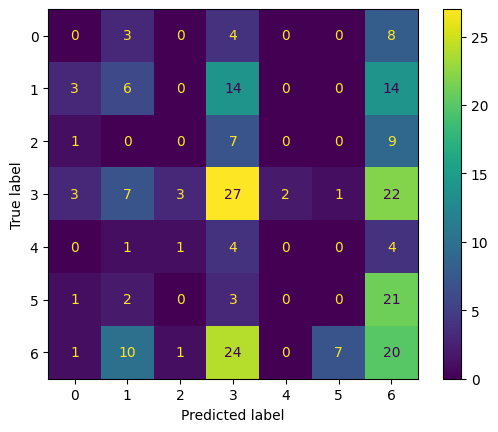

In [ ]:
#Random Forest without SMOTE
#Library import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the features and target variable, Split the data into training and test sets
X = df.drop("class_label" , axis=1)
y = df.class_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])
# Train  classifier
RM = RandomForestClassifier(n_estimators=100)
RM.fit(X_train, y_train)
# Test the classifier
y_pred_class = RM.predict(X_val)

# Calculate the model evaluation parameter
print("Accuracy", metrics.accuracy_score(y_val, y_pred_class))
print("weighted Precision", metrics.precision_score(y_val, y_pred_class, average='weighted'))
print("Weighted Recall", metrics.recall_score(y_val, y_pred_class, average='weighted'))
print("Weighted F1 score", metrics.f1_score(y_val, y_pred_class, average='weighted'))
print(classification_report(y_val, y_pred_class))
confusion_matrix = confusion_matrix(y_val, y_pred_class)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

Number of samples in each class before oversampling:
web-pro        360
oop            352
micro-oop      195
web-des        112
database        97
mobile          79
statistical     51
Name: class_label, dtype: int64
Train set size: (934, 5)
Validation set size: (480, 5)
Test set size: (312, 5)
Validation Set Results:
              precision    recall  f1-score   support

    database       0.58      0.65      0.61        65
   micro-oop       0.39      0.49      0.43        65
      mobile       0.74      0.73      0.74        75
         oop       0.23      0.17      0.19        72
 statistical       0.65      0.83      0.73        64
     web-des       0.52      0.45      0.48        71
     web-pro       0.15      0.12      0.13        68

    accuracy                           0.49       480
   macro avg       0.46      0.49      0.47       480
weighted avg       0.46      0.49      0.47       480

Test Set Results:
              precision    recall  f1-score   support

    datab

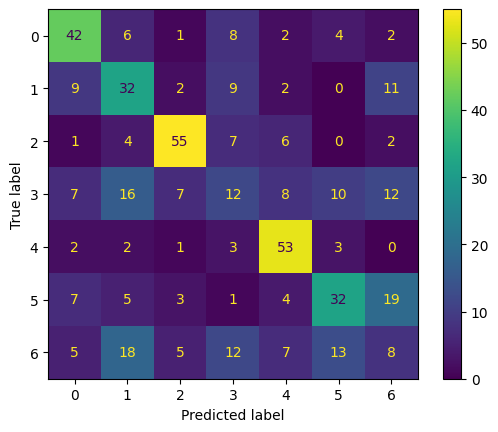

In [ ]:
#Library import
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the features and target variable, 
X = df.drop("class_label" , axis=1)
y = df.class_label

# Count the number of samples in each class before oversampling
print("Number of samples in each class before oversampling:")
print(y.value_counts())

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Oversample the minority class
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val_res.shape)
print("Test set size:", X_test.shape)

# Train a Multinomial Naive Bayes classifier
RM = RandomForestClassifier(n_estimators=100)
RM.fit(X_train_res, y_train_res)
# Test the classifier

# Evaluate the performance of the model on the validation data
y_val_pred = RM.predict(X_val_res)
print("Validation Set Results:")
print(classification_report(y_val_res, y_val_pred))

confusion_matrix = confusion_matrix(y_val_res, y_val_pred)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

# Evaluate the performance of the model on the test data
y_test_pred = RM.predict(X_test)
print("Test Set Results:")
print(classification_report(y_test, y_test_pred))

# Count the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(pd.Series(y_train_res).value_counts())


Train set size: 700
Validation set size: 234
Test set size: 312
Accuracy 0.2863247863247863
weighted Precision 0.15774731070190634
Weighted Recall 0.2863247863247863
Weighted F1 score 0.20294542259046547
              precision    recall  f1-score   support

    database       0.00      0.00      0.00        15
   micro-oop       0.00      0.00      0.00        37
      mobile       0.00      0.00      0.00        17
         oop       0.31      0.51      0.38        65
 statistical       0.00      0.00      0.00        10
     web-des       0.00      0.00      0.00        27
     web-pro       0.27      0.54      0.36        63

    accuracy                           0.29       234
   macro avg       0.08      0.15      0.11       234
weighted avg       0.16      0.29      0.20       234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

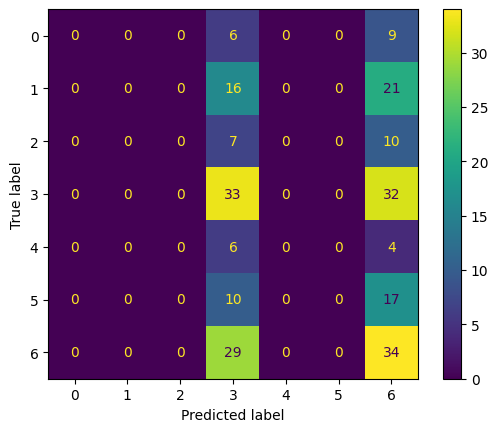

In [ ]:
#Library import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the features and target variable, Split the data into training and test sets
X = df.drop("class_label" , axis=1)
y = df.class_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])
# Train  classifier
LR = LogisticRegression()
LR.fit(X_train, y_train)
# Test the classifier
y_pred_class = LR.predict(X_val)

# Calculate the model evaluation parameter
print("Accuracy", metrics.accuracy_score(y_val, y_pred_class))
print("weighted Precision", metrics.precision_score(y_val, y_pred_class, average='weighted'))
print("Weighted Recall", metrics.recall_score(y_val, y_pred_class, average='weighted'))
print("Weighted F1 score", metrics.f1_score(y_val, y_pred_class, average='weighted'))
print(classification_report(y_val, y_pred_class))
confusion_matrix = confusion_matrix(y_val, y_pred_class)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

Number of samples in each class before oversampling:
web-pro        360
oop            352
micro-oop      195
web-des        112
database        97
mobile          79
statistical     51
Name: class_label, dtype: int64
Train set size: (934, 5)
Validation set size: (480, 5)
Test set size: (312, 5)
Validation Set Results:
              precision    recall  f1-score   support

    database       0.14      0.25      0.18        65
   micro-oop       0.16      0.34      0.22        65
      mobile       0.15      0.13      0.14        75
         oop       0.12      0.11      0.12        72
 statistical       0.15      0.12      0.14        64
     web-des       0.12      0.07      0.09        71
     web-pro       0.00      0.00      0.00        68

    accuracy                           0.14       480
   macro avg       0.12      0.15      0.13       480
weighted avg       0.12      0.14      0.12       480

Test Set Results:
              precision    recall  f1-score   support

    datab

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

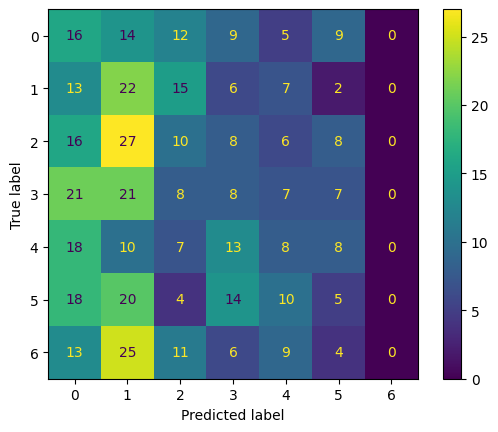

In [ ]:
from logging import LogRecord
#Library import
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define the features and target variable, 
X = df.drop("class_label" , axis=1)
y = df.class_label

# Count the number of samples in each class before oversampling
print("Number of samples in each class before oversampling:")
print(y.value_counts())

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Oversample the minority class
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val_res.shape)
print("Test set size:", X_test.shape)

# Train a Multinomial Naive Bayes classifier
LR = LogisticRegression()
LR.fit(X_train_res, y_train_res)
# Test the classifier

# Evaluate the performance of the model on the validation data
y_val_pred = LR.predict(X_val_res)
print("Validation Set Results:")
print(classification_report(y_val_res, y_val_pred))

confusion_matrix = confusion_matrix(y_val_res, y_val_pred)
#print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix).plot()

# Evaluate the performance of the model on the test data
y_test_pred = LR.predict(X_test)
print("Test Set Results:")
print(classification_report(y_test, y_test_pred))

# Count the number of samples in each class after oversampling
print("Number of samples in each class after oversampling:")
print(pd.Series(y_train_res).value_counts())


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset_with_classlebel_changed v1.csv')

# Separate features and labels
X = df.drop("class_label" , axis=1)
y = df.class_label

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Reshape input data for LSTM layer
X_train = tf.expand_dims(X_train, axis=2)
X_test = tf.expand_dims(X_test, axis=2)

## Define the model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 category

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predict labels for test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

Epoch 1/10
32/32 [==============================] - 9s 41ms/step - loss: 1.8841 - accuracy: 0.2681 - val_loss: 1.8307 - val_accuracy: 0.3280
Epoch 2/10
32/32 [==============================] - 1s 21ms/step - loss: 1.7582 - accuracy: 0.2711 - val_loss: 1.7368 - val_accuracy: 0.3000
Epoch 3/10
32/32 [==============================] - 1s 22ms/step - loss: 1.7435 - accuracy: 0.2751 - val_loss: 1.7370 - val_accuracy: 0.3200
Epoch 4/10
32/32 [==============================] - 1s 23ms/step - loss: 1.7427 - accuracy: 0.2741 - val_loss: 1.7310 - val_accuracy: 0.2960
Epoch 5/10
32/32 [==============================] - 1s 20ms/step - loss: 1.7425 - accuracy: 0.2861 - val_loss: 1.7208 - val_accuracy: 0.3240
Epoch 6/10
32/32 [==============================] - 1s 23ms/step - loss: 1.7394 - accuracy: 0.2811 - val_loss: 1.7249 - val_accuracy: 0.3280
Epoch 7/10
32/32 [==============================] - 1s 22ms/step - loss: 1.7375 - accuracy: 0.2912 - val_loss: 1.7232 - val_accuracy: 0.3280
Epoch 8/10
32

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
